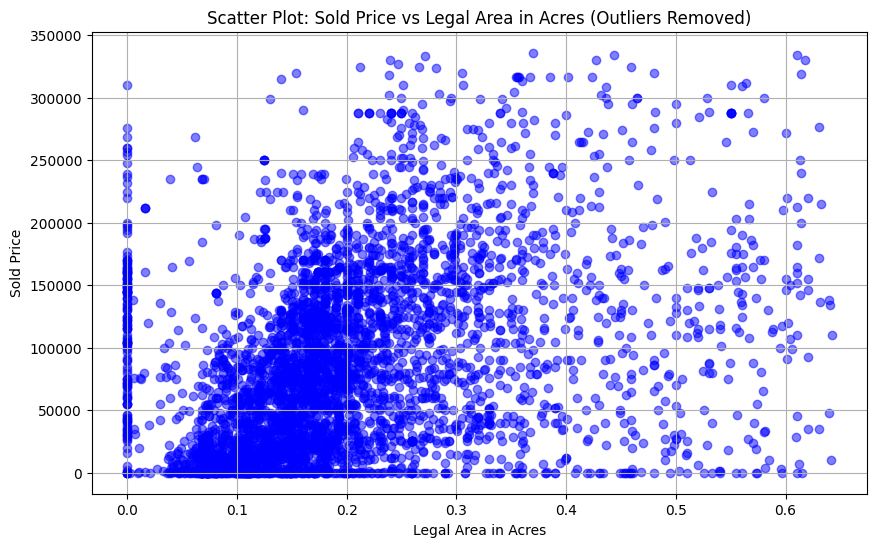

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'SQL CLEANED DATA.csv'  # 1. Import data and convert it to a data frame (using Pandas).
df = pd.read_csv(file_path)

# Compute IQR for 'legal_acrea_in_acres' and 'soldprice'
Q1_area = df['legal_acrea_in_acres'].quantile(0.25)
Q3_area = df['legal_acrea_in_acres'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = df['soldprice'].quantile(0.25)
Q3_price = df['soldprice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filter out the outliers 
filtered_df = df[
    ((df['legal_acrea_in_acres'] > (Q1_area - 1.5 * IQR_area)) & 
    (df['legal_acrea_in_acres'] < (Q3_area + 1.5 * IQR_area))) &
    ((df['soldprice'] > (Q1_price - 1.5 * IQR_price)) & 
    (df['soldprice'] < (Q3_price + 1.5 * IQR_price)))
]

# Scatter plot of filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['legal_acrea_in_acres'], filtered_df['soldprice'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Sold Price vs Legal Area in Acres (Outliers Removed)')
plt.xlabel('Legal Area in Acres')
plt.ylabel('Sold Price')
plt.grid(True)
plt.show()

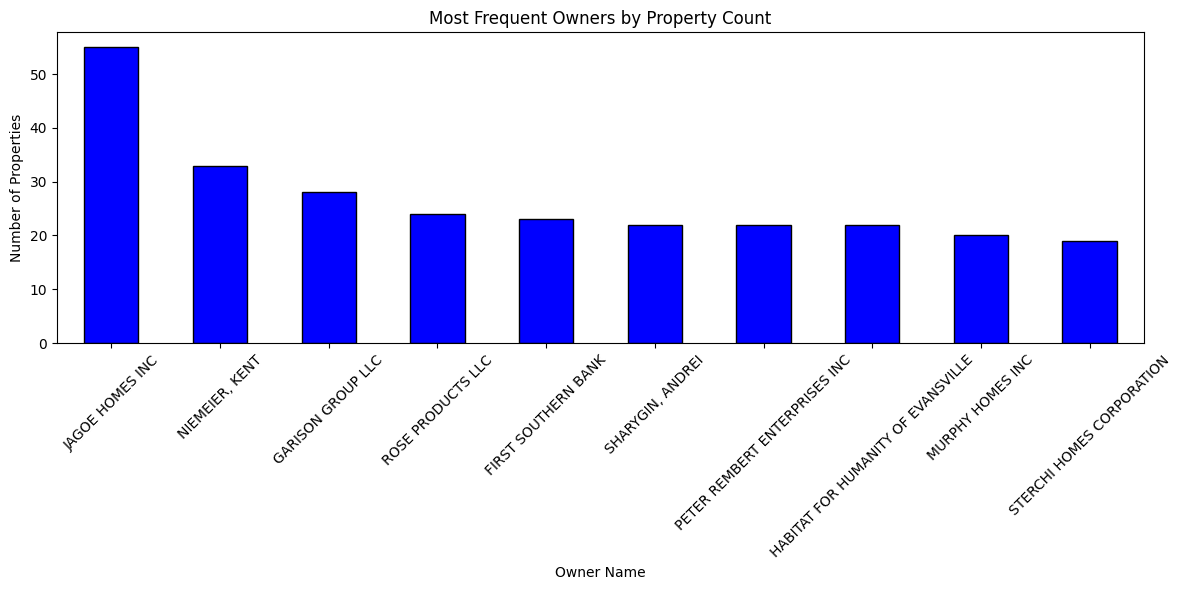

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'SQL CLEANED DATA.csv'  # 1. Import data and convert it to a data frame (using Pandas).
df = pd.read_csv(file_path)

# Count the frequency of each owner and sort them in descending order
owner_counts = df['owner1'].value_counts()

# Select the top 'n' owners (e.g., top 10)
top_n_owners = owner_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_n_owners.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Most Frequent Owners by Property Count')
plt.xlabel('Owner Name')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

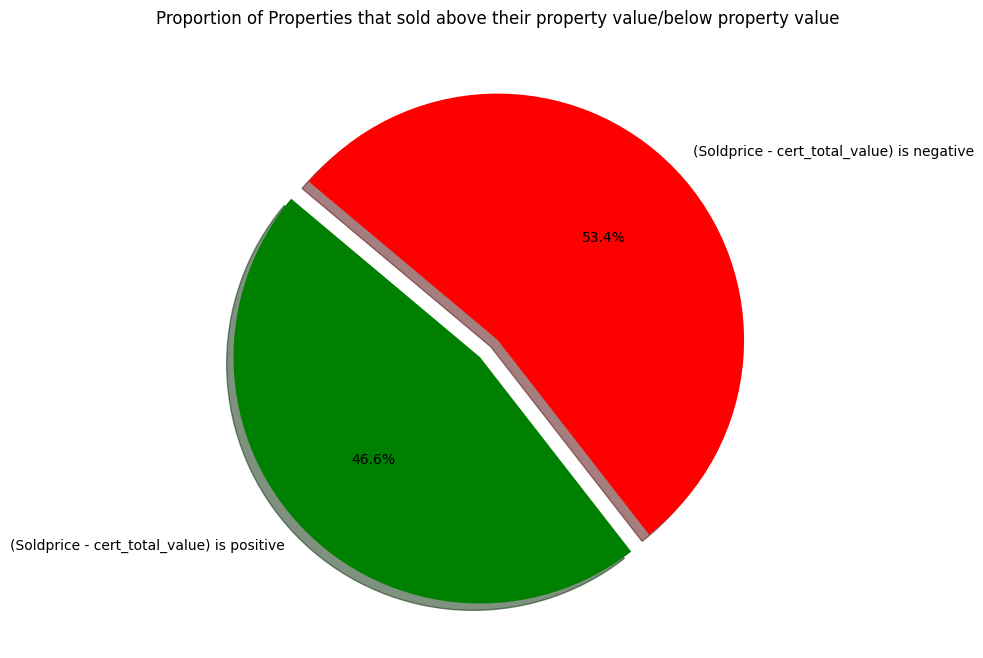

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'SQL CLEANED DATA.csv'  # 1. Import data and convert it to a data frame (using Pandas).
df = pd.read_csv(file_path)

# Calculate the difference
df['difference'] = df['soldprice'] - df['cert_total_value']

# Categorize the data
positive_diff_count = (df['difference'] > 0).sum()
non_positive_diff_count = len(df) - positive_diff_count

# Plot pie chart
labels = ['(Soldprice - cert_total_value) is positive', '(Soldprice - cert_total_value) is negative']
sizes = [positive_diff_count, non_positive_diff_count]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice (i.e., 'Positive Difference')

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Properties that sold above their property value/below property value')
plt.show()


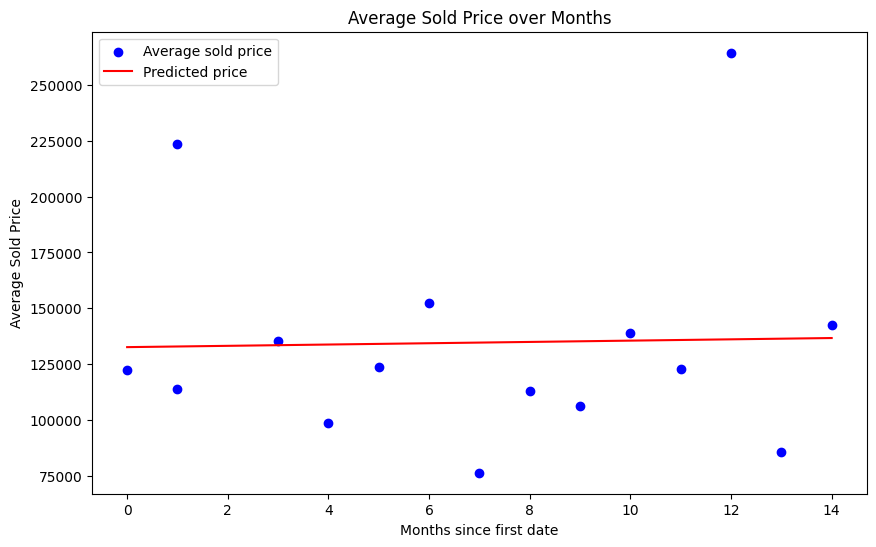

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

file_path = 'SQL CLEANED DATA.csv'  # 1. Import data and convert it to a data frame (using Pandas).
df = pd.read_csv(file_path)

# Convert conveyancedate to datetime format
df['conveyancedate'] = pd.to_datetime(df['conveyancedate'])

# Extract year-month from conveyancedate
df['year_month'] = df['conveyancedate'].dt.to_period('M')

# Calculate average sold price by month
avg_soldprice_by_month = df.groupby('year_month')['soldprice'].mean().reset_index()

# Finding the difference in months from the first date.
avg_soldprice_by_month['months_since_first_date'] = (avg_soldprice_by_month['year_month'].dt.to_timestamp() - avg_soldprice_by_month['year_month'].iloc[0].to_timestamp()).dt.days // 30

# Use 'months_since_first_date' as X and average sold price as y
X = avg_soldprice_by_month[['months_since_first_date']]
y = avg_soldprice_by_month['soldprice']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
avg_soldprice_by_month['predicted'] = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_soldprice_by_month['months_since_first_date'], avg_soldprice_by_month['soldprice'], color='blue', label='Average sold price')
plt.plot(avg_soldprice_by_month['months_since_first_date'], avg_soldprice_by_month['predicted'], color='red', label='Predicted price')
plt.xlabel('Months since first date')
plt.ylabel('Average Sold Price')
plt.title('Average Sold Price over Months')
plt.legend()
plt.show()



In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

file_path = 'SQL CLEANED DATA.csv'  # 1. Import data and convert it to a data frame (using Pandas).
data = pd.read_csv(file_path)

# Filter the data based on legal_acrea_in_acres
data = data[data['legal_acrea_in_acres'] < 2.0]

# Convert conveyancedate to datetime format
data['conveyancedate'] = pd.to_datetime(data['conveyancedate'])
data['year_month'] = data['conveyancedate'].dt.to_period('M')

# Convert year_month to a continuous integer
data['months_since_first_date'] = (data['year_month'].dt.to_timestamp() - data['year_month'].iloc[0].to_timestamp()).dt.days // 30

# Create features X and target y
X = data[['months_since_first_date', 'legal_acrea_in_acres']]
y = data['soldprice']

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# UI for prediction
year = int(input("Enter the year: "))
month = int(input("Enter the month (1-12): "))
acres = float(input("Enter the legal area in acres (must be less than 2.0): "))

# Ensure the entered acres is valid
if acres >= 2.0:
    print("Please provide a valid legal area in acres (less than 2.0)")
else:
    # Convert year, month to 'months_since_first_date'
    date = pd.Timestamp(year=year, month=month, day=1)
    months_since_first_date = (date - data['year_month'].iloc[0].to_timestamp()).days // 30

    predicted_price = model.predict([[months_since_first_date, acres]])[0]
    print(f"Predicted sold price for the property in {month}/{year} with {acres} acres is: ${predicted_price:.2f}")


Mean Squared Error on Test Set: 12885275631.603155


Enter the year:  2015
Enter the month (1-12):  3
Enter the legal area in acres (must be less than 2.0):  1.7


Predicted sold price for the property in 3/2015 with 1.7 acres is: $363526.93
